# Twitter Sentiment Analysis
We will make use of the `Tweepy` API which allows us to stream tweets in real-time directly from twitter

In [33]:
import tweepy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import graph_objs as go

## Read the data

In [4]:
train = pd.read_csv("./data/train.csv")
test = pd.read_csv("./data/test.csv")
sample = pd.read_csv("./data/sample_submission.csv")

## Understand the data

In [5]:
print("Shape:")
print("Train : ", train.shape)
print("Test  : ", test.shape)

Shape:
Train :  (27481, 4)
Test  :  (3534, 3)


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27481 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27481 non-null  object
dtypes: object(4)
memory usage: 858.9+ KB


In [7]:
# since we have only one null value, we just drop it
train.dropna(inplace=True)

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3534 entries, 0 to 3533
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   textID     3534 non-null   object
 1   text       3534 non-null   object
 2   sentiment  3534 non-null   object
dtypes: object(3)
memory usage: 83.0+ KB


In [9]:
train.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [10]:
train.describe()

,textID,text,selected_text,sentiment
count,27480,27480,27480,27480
unique,27480,27480,22463,3
top,cb774db0d1,"I`d have responded, if I were going",good,neutral
freq,1,1,199,11117


## Distribution of tweets in the train set

In [27]:
# table
temp = train.groupby("sentiment").count()["text"].reset_index().sort_values(by="text", ascending=False)
temp.style.background_gradient(cmap="Blues")

,sentiment,text
1,neutral,11117
2,positive,8582
0,negative,7781


<AxesSubplot: xlabel='sentiment', ylabel='count'>

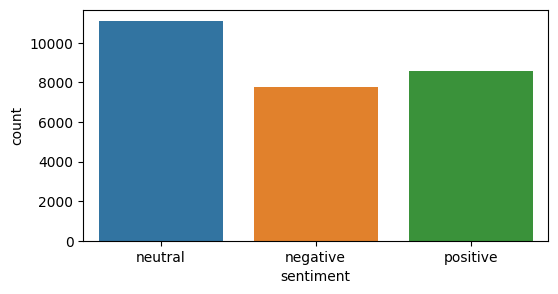

In [30]:
# bar plot
plt.figure(figsize=(6, 3))
sns.countplot(x="sentiment", data=train)

## Jaccard Index
The Jaccard Index is a measure of similarity between two phrases. <br>
It is defined as follows:

![jaccard_index](./images/jaccard.png)

In [42]:
def jaccard(str1, str2):
    a = set(str1.lower().split())
    b = set(str2.lower().split())
    print(a)
    print(b)
    c = a.intersection(b)
    print(c)
    return float(len(c)) / (len(a) + len(b) - len(c))